In [26]:
from irrep.bandstructure import BandStructure

import numpy as np
import scipy
from wannierberri.symmetry.projections import Projection, ProjectionsSet
from wannierberri.w90files import Wannier90data

bands_pw = np.loadtxt("./data/diamond.bands_pw.dat.gnu")
bohr_ang = scipy.constants.physical_constants['Bohr radius'][0] / 1e-10
alatt = 6.1* bohr_ang
bands_pw[:,0]*= 2*np.pi/alatt



bandstructure = BandStructure(code="espresso", 
                              prefix="./data/di-irred", 
                              normalize=False,
                            #   select_grid=[2,2,2], # Try to uncomment this line to reduce the grid
                              irreducible=True)
sg = bandstructure.spacegroup
# sg.show()

positions_bonds = [[ 0,0,0], [0,0,1/2], [0,1/2,0], [1/2,0,0] ]
proj_bond = Projection(position_num=positions_bonds,  orbital="s", spacegroup=sg)

positions_atoms = [[1/8,1/8,1/8], [-1/8,-1/8,-1/8]] 
proj_s = Projection(position_num=positions_atoms, orbital="s", spacegroup=sg)
proj_p = Projection(position_num=positions_atoms, orbital="p", spacegroup=sg)
# projections = ProjectionsSet([proj_s, proj_p])

projections = ProjectionsSet([proj_bond])


w90data = Wannier90data().from_bandstructure(bandstructure, 
                                             projections=projections, 
                                             files=["mmn", "amn", "eig", "symmetrizer"], 
                                             normalize=False,
                                             irreducible=True,
                                             read_npz_list=[],
                                             write_npz_list=[])

# w90data.get_file("symmetrizer").data.keys()

froz_max=22
# w90data.select_bands(win_min=-np.inf, win_max = 100)

w90data.wannierise(
                init = "amn",
                froz_min=-np.inf,
                froz_max=froz_max,
                print_progress_every=10,
                num_iter=101,
                conv_tol=1e-6,
                mix_ratio_z=1.0,
                sitesym=True,
                )


finding num points from 1 projections
got irreducible=True, mp_grid=None, seedname=wannier90, files=['mmn', 'amn', 'eig', 'symmetrizer'], read_npz_list=[], write_npz_list=[], projections=ProjectionsSet with 4 Wannier functions and 0 free variables
Projection 0.0, 0.0, 0.0:['s'] with 4 Wannier functions on 4 points (1 per site), unk_grid=None, normalize=False
self.irreducible=True
mpgrid = [4 4 4], 8
grid: (np.int64(4), np.int64(4), np.int64(4)), selected_kpoints: [0 1 2 3 4 5 6 7]
kptirr: [0 1 2 3 4 5 6 7]
restored kpt_latt_grid: [[ 0.    0.    0.  ]
 [ 0.    0.    0.25]
 [ 0.    0.   -0.5 ]
 [ 0.    0.25  0.25]
 [ 0.    0.25 -0.5 ]
 [ 0.    0.25 -0.25]
 [ 0.   -0.5  -0.5 ]
 [ 0.25 -0.5  -0.25]
 [ 0.   -0.25  0.  ]
 [-0.25 -0.25 -0.25]
 [-0.25  0.    0.  ]
 [ 0.25  0.    0.  ]
 [ 0.25  0.25  0.25]
 [ 0.    0.25  0.  ]
 [ 0.    0.   -0.25]
 [ 0.    0.5   0.  ]
 [ 0.5   0.5   0.5 ]
 [ 0.5   0.    0.  ]
 [ 0.25  0.    0.25]
 [ 0.   -0.25 -0.25]
 [-0.25  0.   -0.25]
 [ 0.25  0.25  0.  ]
 [

/home/stepan/github/wannier-berri-work/wannier-berri-eig-mmn/wannierberri/wannierise/wannierizer.py:230: UserWarning: Ray is not initialized, running in serial mode
  warnings.warn("Ray is not initialized, running in serial mode")


<>:9: SyntaxWarning: invalid escape sequence '\G'
<>:9: SyntaxWarning: invalid escape sequence '\G'
<>:9: SyntaxWarning: invalid escape sequence '\G'
<>:9: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipykernel_593499/3209766959.py:9: SyntaxWarning: invalid escape sequence '\G'
  labels = ["L", "$\Gamma$", "X", "K", "$\Gamma$"],
/tmp/ipykernel_593499/3209766959.py:9: SyntaxWarning: invalid escape sequence '\G'
  labels = ["L", "$\Gamma$", "X", "K", "$\Gamma$"],


setting Rvec
expjphase1 (1, 4, 8)
Real-space lattice:
 [[-1.61399049  0.          1.61399049]
 [ 0.          1.61399049  1.61399049]
 [-1.61399049  1.61399049  0.        ]]
Number of wannier functions: 4
Number of R points: 141
Recommended size of FFT grid [4 4 4]
Starting run()
Using the follwing calculators : 
############################################################

 'tabulate'  :  <wannierberri.calculators.tabulate.TabulatorAll object at 0x74aa32f43980>  : 
    TabulatorAll - a pack of all k-resolved calculators (Tabulators)
    
 Includes the following tabulators : 
--------------------------------------------------
 "Energy" : <wannierberri.calculators.tabulate.Energy object at 0x74aa23400d40> : calculator not described

--------------------------------------------------

############################################################
Calculation along a path - checking calculators for compatibility
tabulate <wannierberri.calculators.tabulate.TabulatorAll object at 0x74aa32f4398

/home/stepan/github/wannier-berri-work/wannier-berri-eig-mmn/wannierberri/grid/path.py:163: UserWarning: symmetry is not used for a tabulation along path
  warnings.warn("symmetry is not used for a tabulation along path")


time for processing    573 K-points in serial:     0.3842 ; per K-point          0.0007 ; proc-sec per K-point          0.0007
time1 =  0.011533737182617188
Totally processed 573 K-points 
run() finished


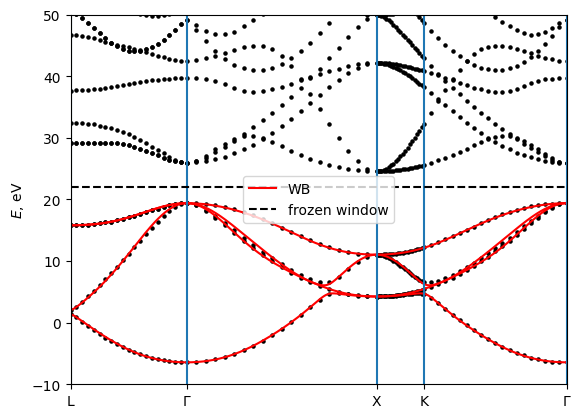

In [27]:
from matplotlib import pyplot as plt
from wannierberri.grid import Path
from wannierberri import evaluate_k_path
from wannierberri.system import System_w90
system = System_w90(w90data=w90data)

path = Path(system=system,
            nodes = [[1/2,1/2,1/2], [0,0,0], [1/2,-1/2,0], [3/8, -3/8, 0], [0,0,0]],
            labels = ["L", "$\Gamma$", "X", "K", "$\Gamma$"],
            length=500)

bands_wb = evaluate_k_path(system=system, path=path)

plt.scatter(bands_pw[:,0], bands_pw[:,1], c="black", s=5)



bands_wb.plot_path_fat(path,
                quantity=None,
                # save_file="Fe_bands.pdf",
                Eshift=0,
                Emin=-10, Emax=50,
                iband=None,
                mode="fatband",
                fatfactor=20,
                cut_k=False,
                linecolor="red",
                close_fig=False,
                show_fig=False,
                label=f"WB"
                )

# plt.ylim(-10, 40)
plt.hlines(froz_max, 0, bands_pw[-1,0], linestyles="dashed", label="frozen window", color="black")
plt.legend()
plt.show()